<a href="https://colab.research.google.com/github/ppojawa/machine-learning-bootcamp/blob/main/supervised/03_classification/02_k_neighbors_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

In [2]:
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

In [4]:
df = pd.DataFrame(data=np.c_[data, target], columns=all_data['feature_names'] + ['class'])

In [5]:
data = data[:, 2:]

print('data shape:', data.shape)
print('target shape:', target.shape)

data shape: (150, 2)
target shape: (150,)


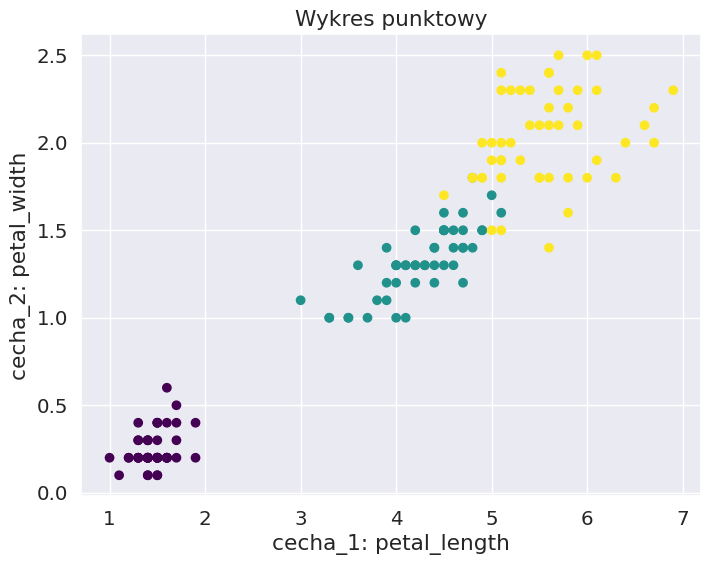

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis')
plt.title('Wykres punktowy')
plt.xlabel('cecha_1: petal_length')
plt.ylabel('cecha_2: petal_width')
plt.show()

In [7]:
df = pd.DataFrame(data=np.c_[data, target], columns=['petal_length', 'petal_width', 'class'])
px.scatter(df, x='petal_length', y='petal_width', color='class', width=800)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(data, target)

KNeighborsClassifier()

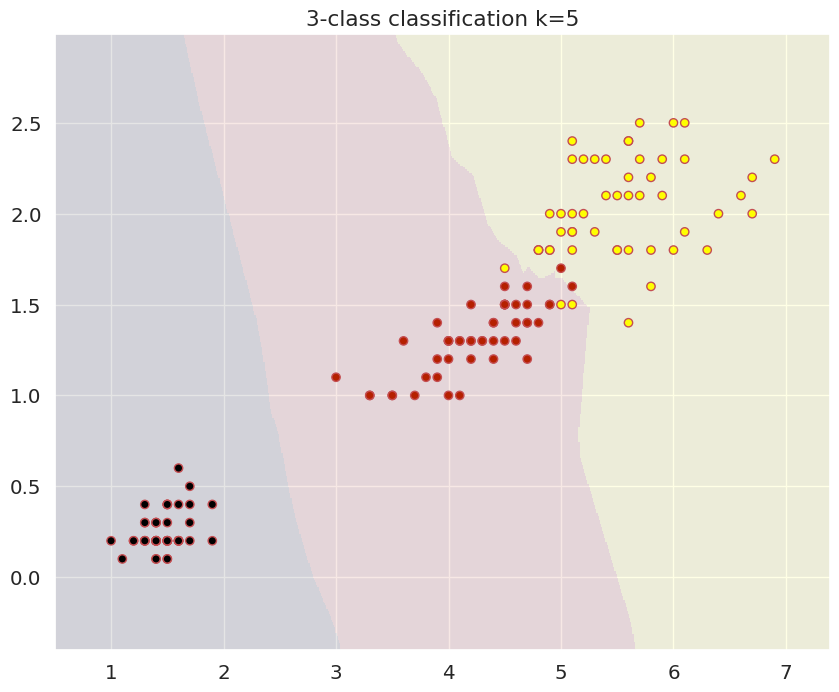

In [9]:
x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('3-class classification k=5')
plt.show()